In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_DA = df[df['job_title_short']=='Data Analyst'].copy()

In [ ]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US['salary_year_avg'].sample(10)


610187     66756.000000
178605     75000.000000
211315     77150.000000
506314     81311.500000
28124      88694.000000
473866     90000.000000
732785     92500.000000
724981     92550.000000
161905     93943.203125
762897    111175.000000
Name: salary_year_avg, dtype: float64

<Axes: >

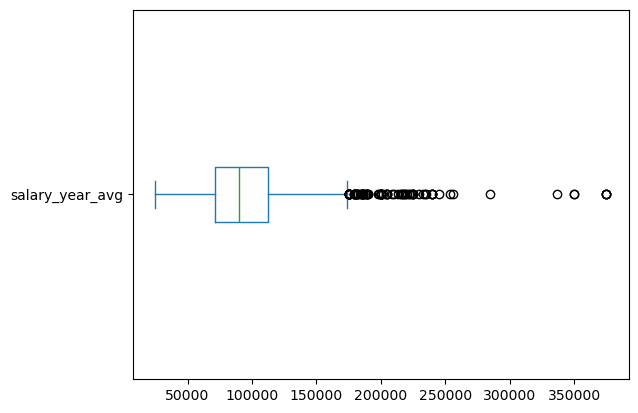

In [7]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)
## OR
# plt.boxplot(df_DA_US['salary_year_avg'])



C:\Users\siddu\AppData\Local\Temp\ipykernel_3456\3032107438.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=job_titles, vert=False)


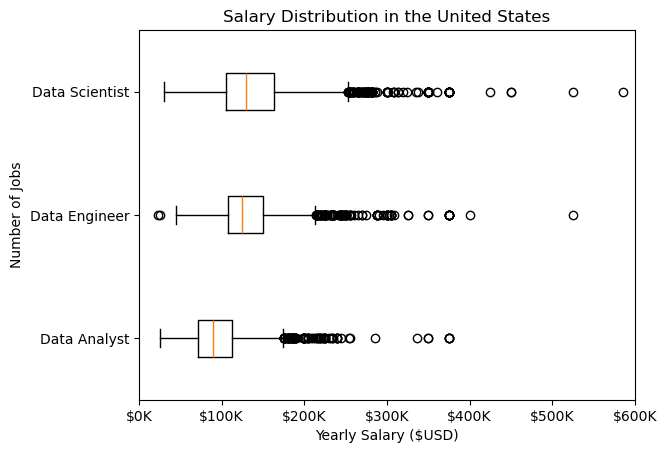

In [17]:
job_titles=['Data Analyst', 'Data Engineer','Data Scientist']
df_US=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US=df_US.dropna(subset=['salary_year_avg'])
job_list=[df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list,labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Jobs')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()


109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64